## Plot the convergence timeline

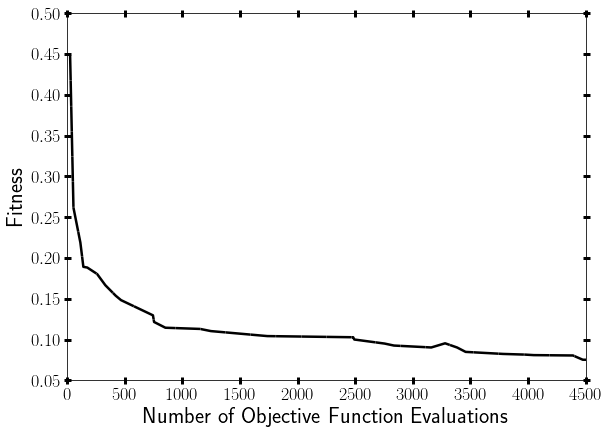

In [1]:
import os
import sys

import pandas as pd
import numpy as np
%matplotlib inline

sys.path.insert(0,os.path.abspath('/home/pyne-user/Dropbox/UCB/Computational_Tools/Scripts/Python/Support'))
from Plotting import line_plot

# Read in the data
timeline = pd.read_table("timeline.txt", header=None, sep='\s+')
timeline.columns = ['Generation', 'Func_Eval', 'Fitness', 'nps', 'member#']

# Plot
data = np.array([timeline['Func_Eval'], timeline['Fitness']])
line_plot(data, xMin=0, xMax=4500, yMin=0.05, yMax=0.5, legend=False, yLabel='Fitness',
          xLabel='Number of Objective Function Evaluations', savePath='converge_plot')

## Plot Final Population

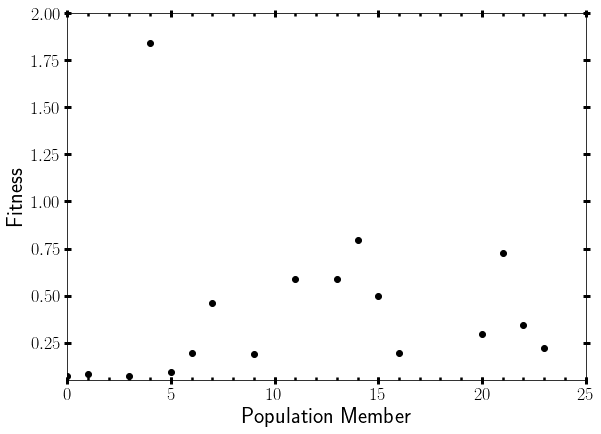

In [2]:
import os
import sys

import pandas as pd
import numpy as np
%matplotlib inline

sys.path.insert(0,os.path.abspath('/home/pyne-user/Dropbox/UCB/Computational_Tools/Scripts/Python/Support'))
from Plotting import scatter_plot

# Read in the data
timeline = pd.read_table("final_pop.txt", header=None, sep='\s+')
timeline.columns = ['Func_Eval', 'Fitness']

# Plot
data = np.array([timeline['Func_Eval'], timeline['Fitness']])
scatter_plot(data, xMin=0, xMax=25, yMin=0.05, yMax=2.0, legend=False, yLabel='Fitness',
             xMinorTicks=1, xLabel='Population Member #', savePath='pop_plot')


## Transition from Coeus Model to Engineering Design

### Remove Iodine
Iodine is not a great choice as it readily sublimes and is of limited availability.  It should not have been in the materials library. The first design without Iodine is 4390. This shows the fitness hit taken:

In [6]:
import os
import sys

import numpy as np

sys.path.insert(0,os.path.abspath('../../../Coeus/Code'))
from ObjectiveFunction import ObjectiveFunction
from UserInputs import UserInputs
from MCNP_Utilities import Read_MCNP_Output

# Read Objective Spectrum
inp = UserInputs(coeusInputPath='../../../Coeus/Inputs/user_inputs.txt')
obj = inp.read_coeus_settings()

# ETA-4575
(tally, fissions, weight) = Read_MCNP_Output('ETA_4575.out', '24', '14')                         
fit4575 = obj.func(tally[:,1], False)
print 'ETA #4575 fitness = {}'.format(fit4575) 

# ETA-4561
(tally, fissions, weight) = Read_MCNP_Output('ETA_4561.out', '24', '14')                         
fit4561 = obj.func(tally[:,1], False)
print 'ETA #4561 fitness = {}'.format(fit4561)              

# ETA-4475
(tally, fissions, weight) = Read_MCNP_Output('ETA_4475.out', '24', '14')                         
fit4475 = obj.func(tally[:,1], False)
print 'ETA #4475 fitness = {}'.format(fit4475)              

# ETA-4390
(tally, fissions, weight) = Read_MCNP_Output('ETA_4390.out', '24', '14')                         
fit4390 = obj.func(tally[:,1], False)
print 'ETA #4390 fitness = {}'.format(fit4390)      

print '\nThe increase in fitness is {}%'.format((fit4390-fit4575)/fit4575*100)

ETA #4575 fitness = 0.795146164356
ETA #4561 fitness = 0.793763316383
ETA #4475 fitness = 0.802788834015
ETA #4390 fitness = 0.838697935163

The increase in fitness is 5.47720315577%


### Remove Potassium and Extra Void
Potassium oxidizes rapidly in air and reacts vigorously with water, so again a bad choice to have included in the library.  In this case, the Potassium is replaced with Bi, and the extra void is removed:

In [7]:
import os
import sys

import numpy as np

sys.path.insert(0,os.path.abspath('../../../Coeus/Code'))
from ObjectiveFunction import ObjectiveFunction
from UserInputs import UserInputs
from MCNP_Utilities import Read_MCNP_Output

# Read Objective Spectrum
inp = UserInputs(coeusInputPath='../../../Coeus/Inputs/user_inputs.txt')
obj = inp.read_coeus_settings()

# ETA-4390 - K - extra void
(tally, fissions, weight) = Read_MCNP_Output('../Final/Buildup/ETA_1031rmk_I_Void.out', '24', '14')                         
fit4390mod = obj.func(tally[:,1], False)
print 'ETA #4390 fitness = {}'.format(fit4390mod)      

print '\nThe increase in fitness is {}%'.format((fit4390mod-fit4575)/fit4575*100)

ETA #4390 fitness = 0.828257140839

The increase in fitness is 4.16413710667%


### Cost Based Changes
-Remove barium layer (difficult to machine and highly reactive): $\sim$\$2,500 material cost savings plus machining <br/>
-Remove chromium ring: $\sim$\$4,300 material cost savings plus machining <br/>
-Remove aluminum ring: $\sim$\$400 material cost savings plus machining <br/>
-Exchange boron (B) for boron carbide (BC): $\sim$\$20,800 material cost savings <br/>
-Exchange tantalum (Ta) for tungsten (W): $\sim$\$15,200 material cost savings <br/>
-Remove nose cap, snout mount, and make case all aluminum (all were requirements for NIF, but not required for 88-Inch experiments): machining cost savings

In [8]:
import os
import sys

import numpy as np

sys.path.insert(0,os.path.abspath('../../../Coeus/Code'))
from ObjectiveFunction import ObjectiveFunction
from UserInputs import UserInputs
from MCNP_Utilities import Read_MCNP_Output

# Read Objective Spectrum
inp = UserInputs(coeusInputPath='../../../Coeus/Inputs/user_inputs.txt')
obj = inp.read_coeus_settings()

# ETA-4390 - K - extra void
(tally, fissions, weight) = Read_MCNP_Output('../AsConstructed/ETA_1E9.out', '24', '14')                         
fit4390mod = obj.func(tally[:,1], False)
print 'ETA #4390 fitness = {}'.format(fit4390mod)      

print '\nThe increase in fitness is {}%'.format((fit4390mod-fit4575)/fit4575*100)

ETA #4390 fitness = 0.826335555268

The increase in fitness is 3.92247266096%
